<a href="https://colab.research.google.com/github/financieras/math/blob/main/regresion/regresion_lineal04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regresión lineal por descenso del gradiente método no matricial.
## Un pequeño ejemplo **NORMALIZANDO**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Datos de ejemplo
X = np.array([1, 2, 3, 4, 5])
Y = np.array([7, 8, 12, 13, 16])

# Normalización de X e Y
X_mean, X_std = np.mean(X), np.std(X)
Y_mean, Y_std = np.mean(Y), np.std(Y)

X_norm = (X - X_mean) / X_std
Y_norm = (Y - Y_mean) / Y_std

# Parámetros de la regresión
theta1_norm = 0  # Pendiente inicial normalizada
theta0_norm = 0  # Intercepto inicial normalizado

# Configuración del algoritmo
learning_rate = 0.01
num_iterations = 2_000

# Implementación del descenso del gradiente con datos normalizados
for _ in range(num_iterations):
    # Calcular las predicciones actuales
    Y_pred_norm = theta1_norm * X_norm + theta0_norm

    # Calcular los gradientes
    D_theta1_norm = (1/len(X_norm)) * np.sum(X_norm * (Y_pred_norm - Y_norm))
    D_theta0_norm = (1/len(X_norm)) * np.sum(Y_pred_norm - Y_norm)

    # Actualizar los parámetros
    theta1_norm -= learning_rate * D_theta1_norm
    theta0_norm -= learning_rate * D_theta0_norm

# Desnormalización de los parámetros
theta1 = theta1_norm * (Y_std / X_std)
theta0 = Y_mean - theta1 * X_mean + theta0_norm * Y_std

print(f"Intercepto (theta0): {theta0:.4f}")
print(f"Pendiente (theta1): {theta1:.4f}")

Intercepto (theta0): 4.3000
Pendiente (theta1): 2.3000


In [ ]:
# Implementación del método de mínimos cuadrados
X_mincuad = np.column_stack((np.ones(len(X)), X))
theta_mincuad = np.linalg.inv(X_mincuad.T.dot(X_mincuad)).dot(X_mincuad.T).dot(Y)

print("Parámetros por mínimos cuadrados:", theta_mincuad)

Parámetros por mínimos cuadrados: [4.3 2.3]


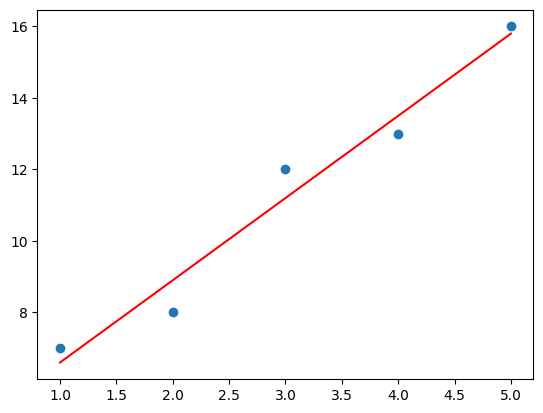

In [ ]:
plt.scatter(X, Y)
plt.plot(X, theta0 + theta1 * X, color='red', label='Regresión')
plt.show()